In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df  = pd.read_csv("HRDataset_v14.csv")

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [44]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [45]:
df.DateofHire

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [46]:
df['DateofHire'] = pd.to_datetime(df.DateofHire)

In [47]:
df.DateofHire

0     2011-07-05
1     2015-03-30
2     2011-07-05
3     2008-01-07
4     2011-07-11
         ...    
306   2014-07-07
307   2008-09-02
308   2010-04-10
309   2015-03-30
310   2014-09-29
Name: DateofHire, Length: 311, dtype: datetime64[ns]

In [48]:
{x:df[x].duplicated().sum() for x in df} # we have no Employees with same name or same ID

{'Employee_Name': 0,
 'EmpID': 0,
 'MarriedID': 309,
 'MaritalStatusID': 306,
 'GenderID': 309,
 'EmpStatusID': 306,
 'DeptID': 305,
 'PerfScoreID': 307,
 'FromDiversityJobFairID': 309,
 'Salary': 3,
 'Termd': 309,
 'PositionID': 281,
 'Position': 279,
 'State': 283,
 'Zip': 153,
 'DOB': 4,
 'Sex': 309,
 'MaritalDesc': 306,
 'CitizenDesc': 308,
 'HispanicLatino': 307,
 'RaceDesc': 305,
 'DateofHire': 210,
 'DateofTermination': 214,
 'TermReason': 293,
 'EmploymentStatus': 308,
 'Department': 305,
 'ManagerName': 290,
 'ManagerID': 287,
 'RecruitmentSource': 302,
 'PerformanceScore': 307,
 'EngagementSurvey': 192,
 'EmpSatisfaction': 306,
 'SpecialProjectsCount': 302,
 'LastPerformanceReview_Date': 174,
 'DaysLateLast30': 304,
 'Absences': 291}

In [60]:
department = df.Department.unique()
print(department)

['Production' 'IT/IS' 'Software Engineering' 'Admin Offices' 'Sales'
 'Executive Office']


In [62]:
df.Department.replace("Production       ", "Production", inplace=True)

In [64]:
department = df.Department.unique()
department

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

In [65]:
positions = df.Position.unique()
positions.sort()
positions

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Analyst ', 'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

In [66]:
df.Position.replace("Data Analyst ", "Data Analyst",inplace=True)
positions = df.Position.unique()
positions.sort()
positions

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

Text(0.5, 1.0, 'Total number of employees in each department')

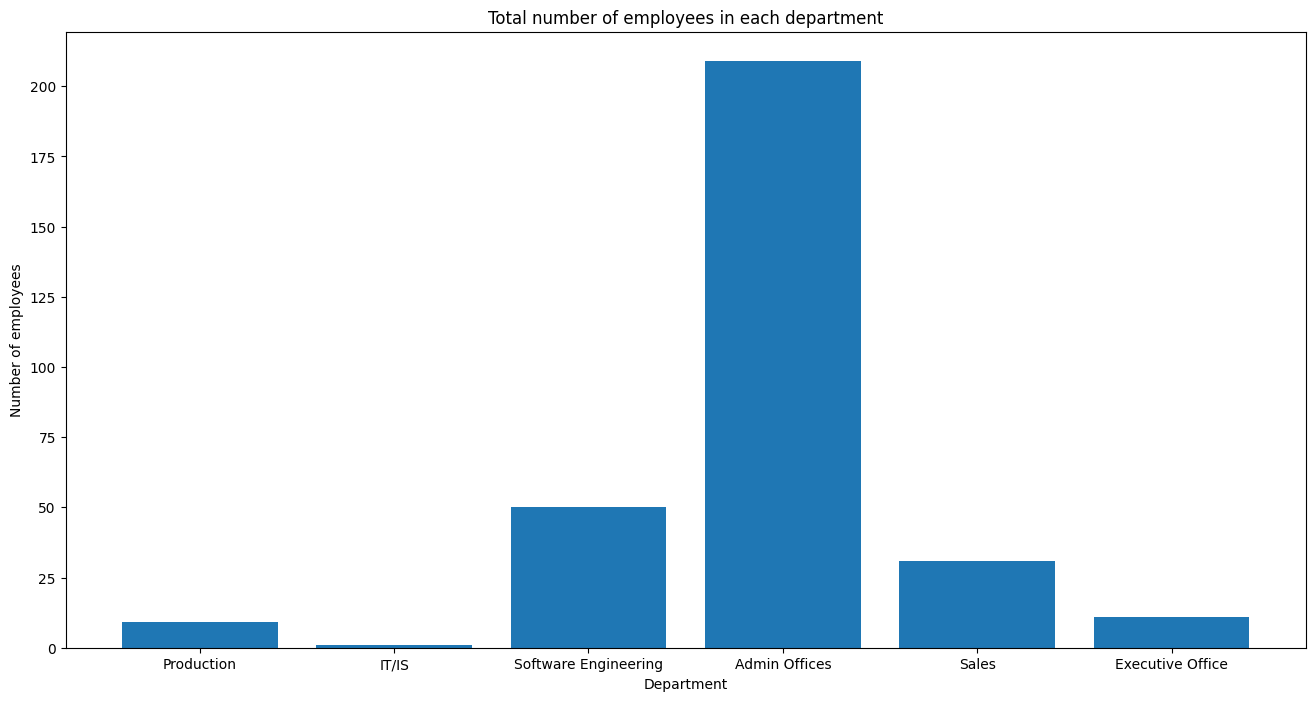

In [91]:
employees_count = df.groupby('Department').Employee_Name.count()
plt.figure(figsize=(16,8))
plt.bar(department, employees_count)
plt.ylabel("Number of employees")
plt.xlabel("Department")
plt.title("Total number of employees in each department")

In [81]:
recruitment = df.RecruitmentSource.unique()
recruitment

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

Text(0.5, 1.0, 'Number of employees Recruited through different hiring sources')

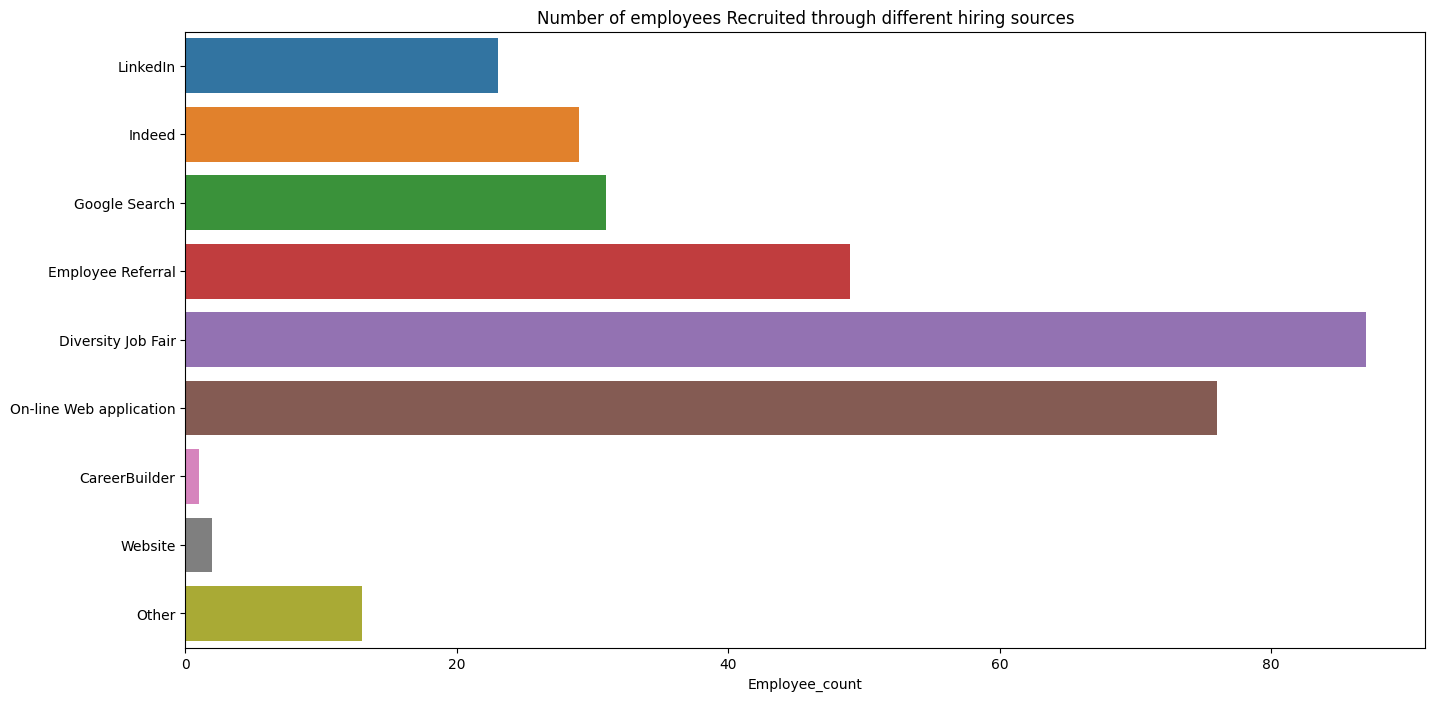

In [95]:
employees_count = df.groupby('RecruitmentSource').Employee_Name.count()
plt.figure(figsize=(16,8))
sns.barplot(x=employees_count, y=recruitment)
plt.xlabel('Employee_count')
plt.title('Number of employees Recruited through different hiring sources')

<AxesSubplot: xlabel='Department', ylabel='Salary'>

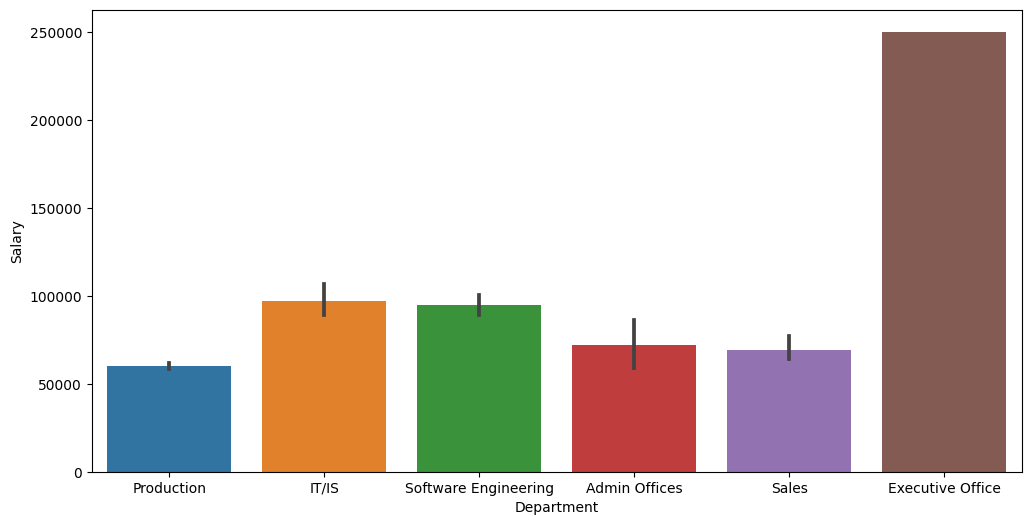

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(x='Department', y='Salary', data=df)

<AxesSubplot: xlabel='PerfScoreID', ylabel='MaritalDesc'>

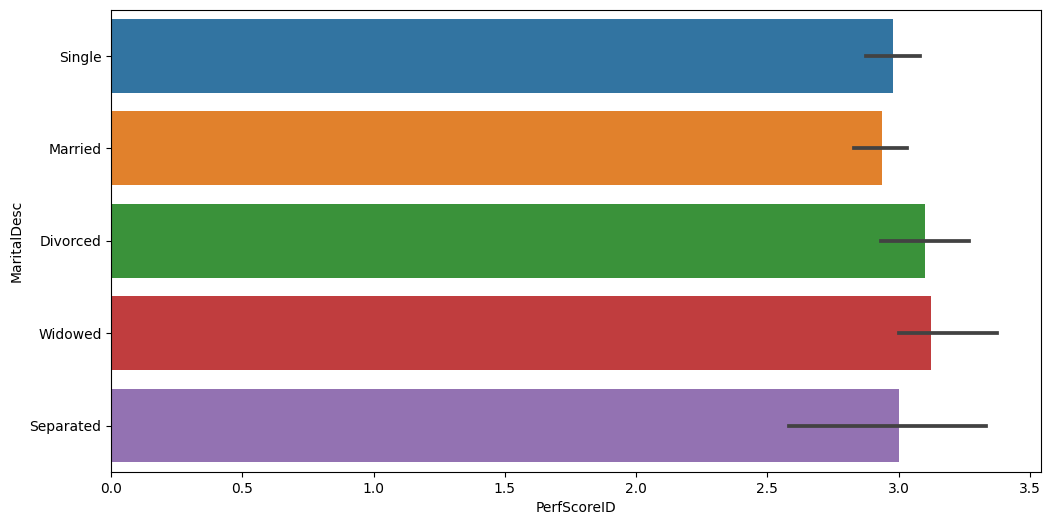

In [112]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.PerfScoreID, y=df.MaritalDesc)

<BarContainer object of 5 artists>

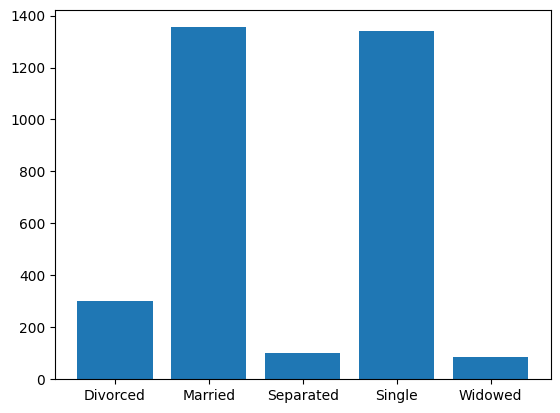

In [151]:
number_of_leaves = df.groupby('MaritalDesc').Absences.sum()
plt.bar(number_of_leaves.index, number_of_leaves.values)

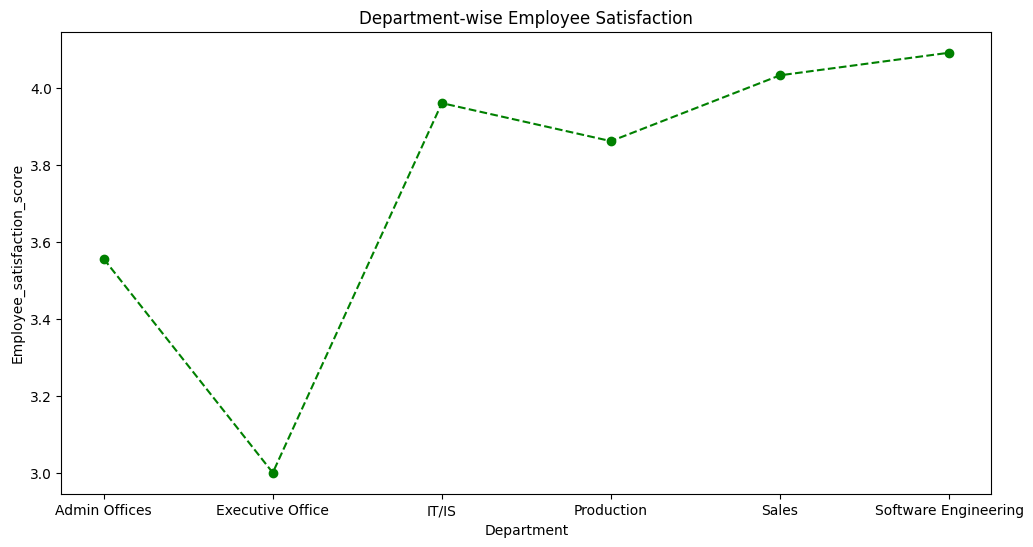

In [153]:
emp_satis = df.groupby('Department').EmpSatisfaction.mean()
plt.figure(figsize=(12,6))
plt.plot(emp_satis, 'o--g')
plt.ylabel('Employee_satisfaction_score')
plt.xlabel('Department')
plt.title('Department-wise Employee Satisfaction');

In [155]:
df.groupby('RaceDesc').Employee_Name.count()

RaceDesc
American Indian or Alaska Native      3
Asian                                29
Black or African American            80
Hispanic                              1
Two or more races                    11
White                               187
Name: Employee_Name, dtype: int64

In [156]:
df_non_white_employee = df[df.RaceDesc != 'White']
df_white_employee = df[df.RaceDesc == 'White']
non_white_employee_salary = df_non_white_employee.Salary.mean()
white_employee_salary = df_white_employee.Salary.mean()
print('Average Salary for white employee is ${:.2f} and average salary for non-white employee is ${:.2f}.'.format(white_employee_salary,non_white_employee_salary))

Average Salary for white employee is $67287.55 and average salary for non-white employee is $71634.37.


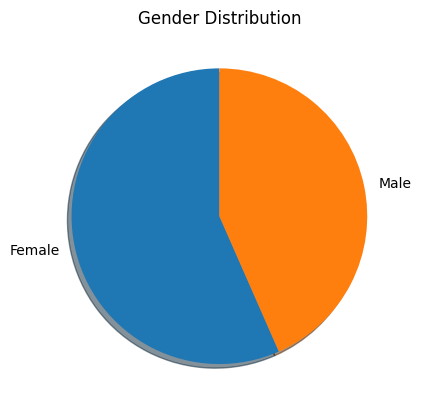

In [169]:
employees_count_by_gender = df.groupby('Sex').Employee_Name.count()
gender = ["Female", "Male"]
plt.pie(employees_count_by_gender, labels = gender, startangle = 90, shadow = True)
plt.title('Gender Distribution');

<AxesSubplot: xlabel='Salary', ylabel='Sex'>

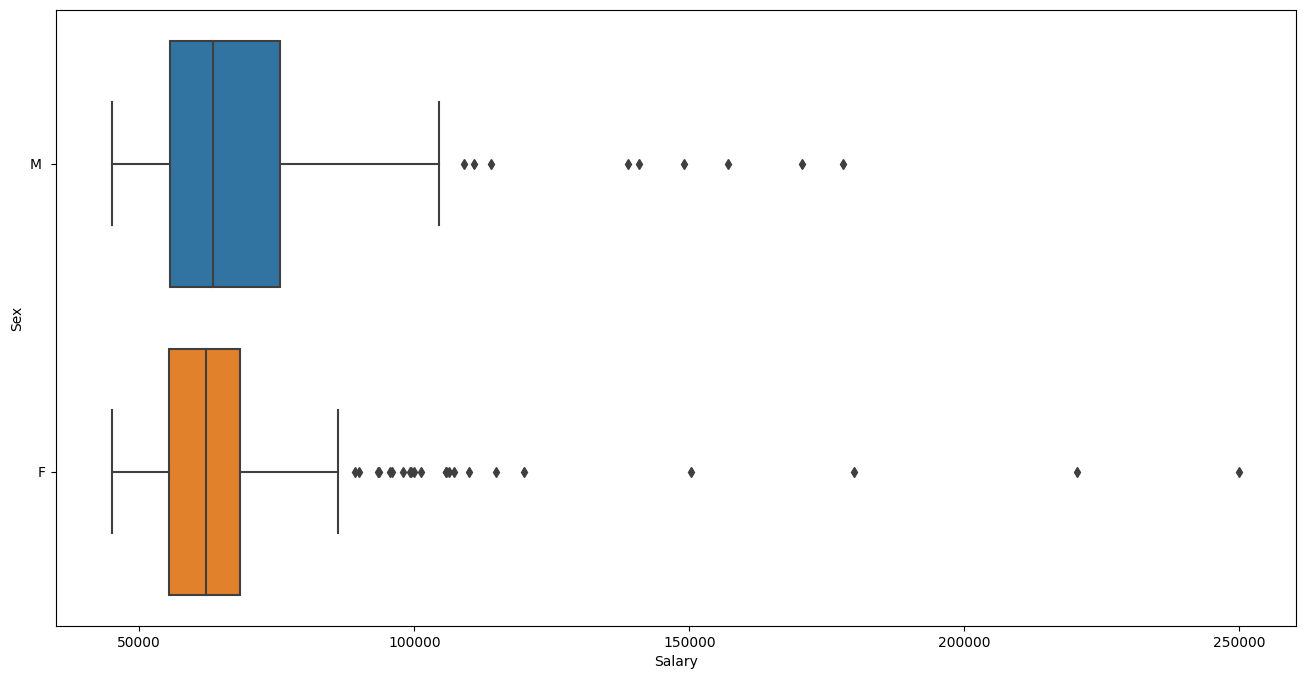

In [196]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df.Salary, y=df.Sex)

In [198]:
female_average_salary = df[df.Sex == 'F'].Salary.mean()
male_average_salary = df[df.Sex == 'M '].Salary.mean()
print("Average salary for male employee {:.2f} and average salary for female employee is {:.2f}".format(male_average_salary, female_average_salary))

Average salary for male employee 70629.40 and average salary for female employee is 67786.73


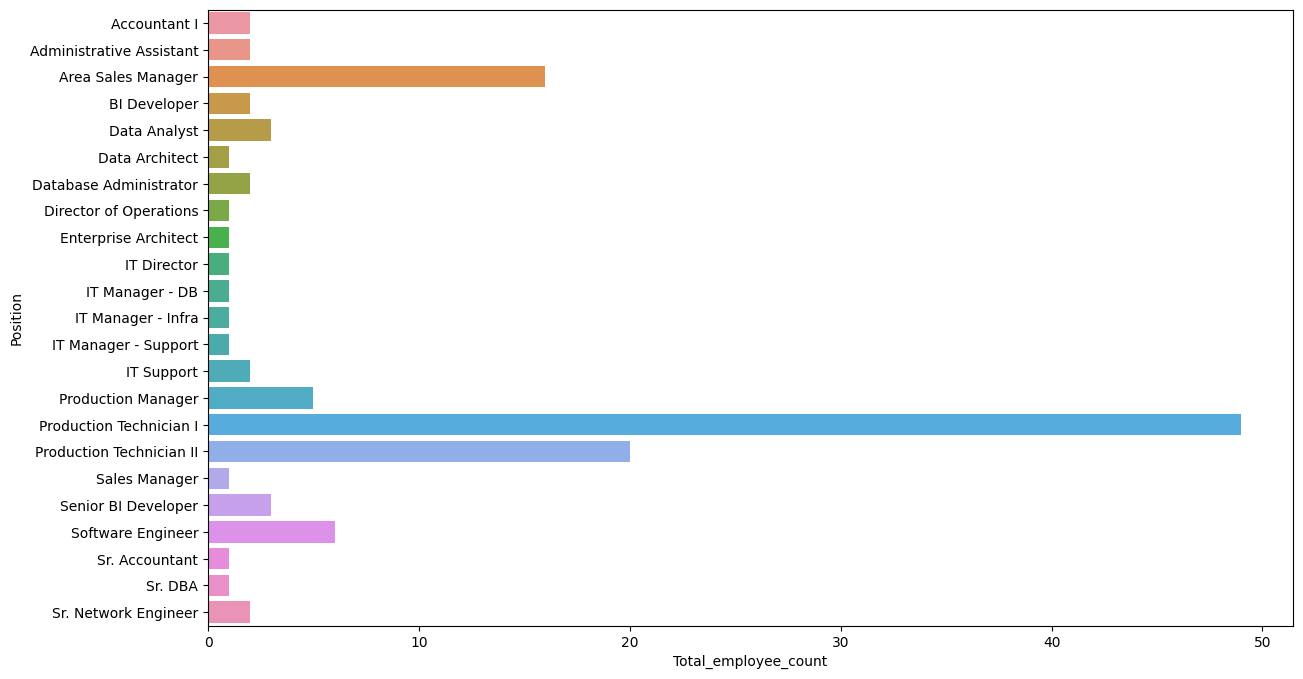

In [201]:
count_of_employee = df[df.RaceDesc != 'White'].groupby('Position').Employee_Name.count()
diff_pos = df_non_white_employee.Position.unique()
diff_pos.sort()
plt.figure(figsize=(14,8))
sns.barplot(x=count_of_employee, y=diff_pos)
plt.xlabel('Total_employee_count')
plt.ylabel('Position');